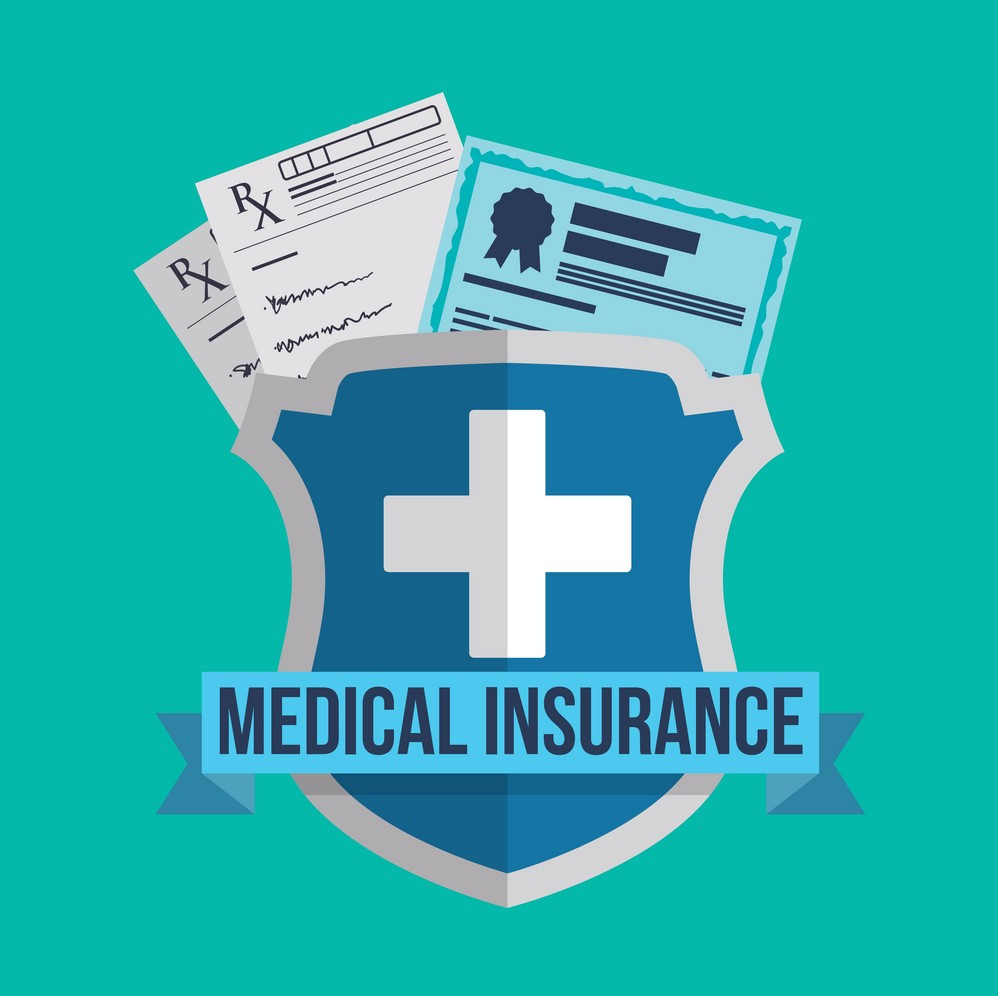

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [322]:
data = pd.read_csv(r"/content/insurance.csv")

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.isna().sum().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
data.info()

# Data Visualisation

In [ ]:
plt.figure(figsize=(6,5))
colors =['#FF7043', '#1abc9c']
plt.pie(data['sex'].value_counts(),
        labels = data['sex'].value_counts().index,
        autopct='%.2f%%',
        startangle=90,
        shadow=True,
        colors=colors)
plt.title("Pie Plot of Male vs Female",fontsize=15,fontweight='bold', color='#2C3E50')
plt.show()

In [ ]:
smoker_by_sex = data.groupby('sex')['smoker'].value_counts().unstack()
smoker_by_sex.plot(kind='bar', stacked=False, figsize=(8, 5), color=['#1abc9c', '#FF7043'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Smoker by Sex Bar Plot', fontsize=15,fontweight='bold', color='#2C3E50')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data= data, x ='age', bins=25, kde=True , color='#1abc9c')
plt.title('Age Distribution', fontsize=15, fontweight='bold', color='#2C3E50')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(data['age'] , color='#FF7043')
plt.title('Age Boxplot', fontsize=15, fontweight='bold', color='#2C3E50')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data= data, x ='bmi', bins=25, kde=True , color='#FF7043')
plt.title('BMI Distribution', fontsize=15, fontweight='bold', color='#2C3E50')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(4,6))
sns.boxplot(data['bmi'] , color='#1abc9c')
plt.title('BMI Boxplot', fontsize=15, fontweight='bold', color='#2C3E50')
plt.show()

In [ ]:
plt.figure(figsize=(6,5))
colors =['#FF7043', '#1abc9c']
plt.pie(data['smoker'].value_counts(), labels= data['smoker'].value_counts().index,
        colors=colors, autopct='%.2f%%',shadow=True,
        explode=[0.05]*2)
plt.title('Smoker Pieplot', fontsize=15, fontweight='bold', color='#2C3E50')
plt.show()

In [ ]:
smoker_by_region = data.groupby('region')['smoker'].value_counts().unstack()
smoker_by_region.plot(kind='bar', stacked=False , figsize=(10, 6), color = ['#1abc9c','#FF7043'])
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Smoker by Region Bar Plot', fontsize=15, fontweight='bold', color='#2C3E50')
plt.xticks(fontsize=12, fontweight='bold', color='#455A64',rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sex_by_children = data.groupby('children')['sex'].value_counts().unstack()
sex_by_children.plot(kind='bar', stacked=False, figsize=(8, 5), color=['#1abc9c', '#FF7043'])
plt.title('Count of Children', fontsize=15, fontweight='bold', color='#2C3E50')
plt.xlabel('Children')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
data.sample(5)

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], color='#1abc9c',kde=True)
plt.title('Charges Distribution', fontsize=15, fontweight='bold', color='#2C3E50')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot( data['charges'] , color='#FF7043')
plt.title('Charges scatter Plot', fontsize=15, fontweight='bold', color='#2C3E50')
plt.show()

In [ ]:
# Scatter plot of charges across different BMI
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x=data['charges'], y=data['bmi'], color='#1abc9c')
plt.title('Charges across Different BMI', fontsize=15, fontweight='bold', color='#2C3E50')
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.show()

In [ ]:
# swarmplot
palette = ['#FF7043', '#1ABC9C', '#FF6F61', '#16A085']

plt.figure(figsize=(10,6))
sns.swarmplot(data=data,x=data['region'],y=data['charges'], palette=palette)
plt.title('Medical Insurance Charges Across Regions', fontsize=16, fontweight='bold', color='#2C3E50')
plt.xlabel('Region', fontsize=14, fontweight='bold', color='#37474F')
plt.ylabel('Charges', fontsize=14, fontweight='bold', color='#37474F')
plt.xticks(fontsize=12, fontweight='bold', color='#455A64')
plt.show()

In [ ]:
# pairplot
plt.figure(figsize=(15,10))
pairplot = sns.pairplot(data, hue='smoker', palette=['#FF7043', '#1abc9c'])
pairplot.fig.suptitle('Pair Plot of Medical Insurance Data', fontsize=16, fontweight='bold', color='#2C3E50')
plt.tight_layout()
plt.show()

In [ ]:
data.head()

# Statistical Analysis / Hypothesis Testing

## 1 . Spearman's Rank Correlation analysis between **BMI** and **Insurance Charges**

* H0 ( Null Hypothesis ) : there is no correlation between BMI and charges

* H1 ( Alternative Hypothesis ) : there is a correlation between BMI and charges

In [ ]:
from scipy.stats import spearmanr
corr, p_value = spearmanr(data['bmi'],data['charges'])
print(f'Spearman correlation coefficient: {corr:.3f}')
print(f'p-value: {p_value:5f}')

# p-value < 0.05 → Reject H₀ → Significant correlation
# p-value ≥ 0.05 → Fail to reject H₀ → No significant correlation

if p_value < 0.5 :
  print('\nThere is correlation between BMI and charges')
else:
  print('\nThere is no correlation between BMI and charges')

## 2. T-test :  Do Smokers Pay Higher Charges Than Non-Smokers?
* H0 (Null Hypothesis): The insurance charges for smokers and non-smokers are same
* H1 (Alternative Hypothesis): Smokers pay higher insurance than non-smokers.


In [ ]:
# to make the data normal distribution which is required to perform t test
# Apply log transformation
data['charges_log'] = np.log1p(data['charges'])

# Check distribution again
sns.histplot(data['charges_log'], kde=True, color='#FF7043')
plt.title('Log-Transformed Charges Distribution', fontsize=14, fontweight='bold', color='#2C3E50')
plt.show()

In [ ]:
# importing independent t test
from scipy.stats import ttest_ind
# spliting data into smokers and non-smokers
smoker = data[data['smoker'] == 'yes']['charges_log']
non_smoker = data[data['smoker'] == 'no']['charges_log']

# Perform independent t-test
t_stat , p_value = ttest_ind(smoker,non_smoker)

print(f"T-statistics: {t_stat:.3f}")
print(f"p_value: {p_value:5f}")

alpha = 0.5
if p_value < alpha :
  print('\nReject the null hypothesis : Smokers pay significantly higher charges')
else:
  print('\nFail to reject the null hypothesis : No significant difference in charges')

### Inference
* A p-value of 0 means the difference between smokers and non-smokers is extremely significant. This suggests that smokers definitely pay higher charges than non-smokers

In [ ]:
data.head()

# Preprocessing & Regression Modelling

In [349]:
from sklearn.preprocessing import LabelEncoder , StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score , root_mean_squared_error , mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
data.head()

In [351]:
# features and label splitting
X = data.drop(columns=['charges'])
y = data['charges']

In [352]:
# train-test split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
data.info()

In [354]:
# pipeline for preprocessing and modelling

num = ['age','bmi','children']
cat = ['sex','smoker','region']
num_pipeline = Pipeline(steps=[
    ('scaler',StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])
col_transformer = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline , num ),
        ('cat_pipeline', cat_pipeline , cat)
        ])

# dropping the charges_log (no longer need)
data = data.drop(columns=['charges_log'])

In [355]:
# Gradient Boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

final_pipeline = make_pipeline(col_transformer, gb_model )

In [ ]:
final_pipeline.fit(X_train,y_train)

In [ ]:
y_pred = final_pipeline.predict(X_test)
print(f'R2 Score : {r2_score(y_test,y_pred)}')
print(f'RMSE : {root_mean_squared_error(y_test,y_pred)}')
print(f'MAE : {mean_absolute_error(y_test,y_pred)}')

In [ ]:

import pickle

# Save the entire pipeline (preprocessor + model)
with open('insurance_model.pkl', 'wb') as f:
    pickle.dump(final_pipeline, f)

print("Model and preprocessing pipeline saved successfully!")


# Correlation

In [ ]:
data_for_corr = data.copy()
encoder = LabelEncoder()
data_for_corr['sex'] = encoder.fit_transform(data_for_corr[['sex']])
data_for_corr['smoker'] = encoder.fit_transform(data_for_corr[['smoker']])
data_for_corr['region'] = encoder.fit_transform(data_for_corr[['region']])

# scaling the data
scaler = StandardScaler()
for i in data_for_corr.columns:
  if data_for_corr[i].dtype == 'int64' or data_for_corr[i].dtype == 'float64':
    data_for_corr[i] = scaler.fit_transform(data_for_corr[[i]])
data_for_corr['bmi'] = scaler.fit_transform(data_for_corr[['bmi']])
data_for_corr['age'] = scaler.fit_transform(data_for_corr[['age']])

# Compute correlation
correlation = data_for_corr.corr()
from matplotlib.colors import LinearSegmentedColormap
custom_palette = LinearSegmentedColormap.from_list("custom_corr", ['#FF7043', 'white', '#1abc9c'])

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap=custom_palette, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', color='#2C3E50')
plt.show()